In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Task 1.

In [32]:
# Let's generate 1000000 random numbers from a normal distribution
# with mean 0 and standard deviation 1
sample = np.random.normal(loc=0, scale=1, size=1000000)

In [33]:
# To find the probability of having a number between -1 and 1
# we can write a boolen expression that checks if the number is
# between -1 and 1. This can be done using numpy's logical_and
# function. This function takes two boolean arrays and returns
# a new boolean array where the i-th element is True if both
# the i-th elements of the input arrays are True.
mask = np.logical_and(sample > -1, sample < 1)

# The probability of having a number between -1 and 1 is the
# number of elements in the mask that are True divided by the
# total number of elements in the sample.
p = np.sum(mask == True) / len(sample)
print("Probability of having a number between -1 and 1: ", p)

Probability of having a number between -1 and 1:  0.682708


In [15]:
# Now let's create a 2D array of random normal numbers
# with 4 rows and 1000000 columns

N = 4
M = 1000000
x2DArray = np.random.normal(loc=0, scale=1, size=(N, M))

# To compute the mean along the rows we can use the np.mean:
xBarArray = np.mean(x2DArray, axis=0)

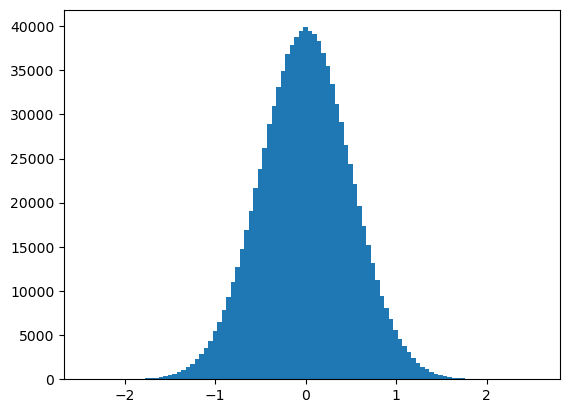

In [23]:
# Now we can plot the histogram of the mean values
plt.hist(xBarArray, bins=100)
plt.show()

In [28]:
# Mean and std of the mean values

mean_of_means = np.mean(xBarArray)
std_of_means = np.std(xBarArray)

print("Computed mean of the means: ", mean_of_means)
print("Computed std of the means: ", std_of_means)

# According to the central limit theorem, the mean of the means
# should be equal to the mean of the original distribution and
# the standard deviation of the means should be equal to the
# standard deviation of the original distribution divided by
# the square root of the number of samples in the mean.

print("Mean of the original distribution: ", np.mean(sample))
print("Std of the original distribution: ", np.std(sample))
print("Std of the means according to the CLT: ", np.std(sample) / np.sqrt(N))


Computed mean of the means:  0.00028961158055975603
Computed std of the means:  0.5003780364043122
Mean of the original distribution:  -0.0018641287262723561
Std of the original distribution:  1.0001659932805054
Std of the means according to the CLT:  0.5000829966402527


In [34]:
# Probability of the means being between -1 and 1:
mask = np.logical_and(xBarArray > -1, xBarArray < 1)
p = np.sum(mask == True) / len(xBarArray)
print("Probability of having a mean between -1 and 1 for N = 4: ", p)

Probability of having a mean between -1 and 1 for N = 4:  0.954096


In [64]:
# Now, let's compute the probability of having a mean between -1 and 1
# as a function of the number of samples N. For each N from 2 to 100
# we will (1) create the 2D array of random normal numbers, (2) compute
# the mean along the rows, (3) compute the probability of having a mean
# between -1 and 1.

# Note: This may take about a minute to compute.

N_range = np.arange(2, 101, 5) # N from 2 to 100 with step size 5
p_values = []
p_values_analytical = []
for N in N_range:
    x2DArray = np.random.normal(loc=0, scale=1, size=(N, M))
    xBarArray = np.mean(x2DArray, axis=0)
    mask = np.logical_and(xBarArray > -1, xBarArray < 1)
    p = np.sum(mask == True) / len(xBarArray)
    p_values.append(p)
    # Analytical probability P(-1 < X < 1) = P(X < 1) - P(X < -1) = F(1) - F(-1),
    # where F is the cumulative distribution function of the normal distribution.
    # According to the central limit theorem, the standard deviation in this case
    # is 1/sqrt(N). F can be computed using scipy.stats.norm.cdf with loc=0 and 
    # scale=1/sqrt(N)
    p_values_analytical.append(
        scipy.stats.norm.cdf(1, loc=0, scale=1 / np.sqrt(N)) - 
        scipy.stats.norm.cdf(-1, loc=0, scale=1 / np.sqrt(N))
    )

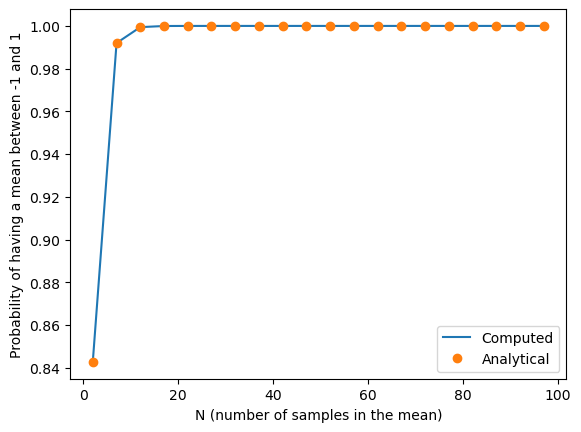

In [62]:
# Let's plot the probability of having a mean between -1 and 1
# as a function of N.

plt.plot(N_range, p_values, label='Computed')
plt.plot(N_range, p_values_analytical, 'o', label='Analytical')
plt.xlabel("N (number of samples in the mean)")
plt.ylabel("Probability of having a mean between -1 and 1")
plt.legend()
plt.show()

In [82]:
# Now let's repeat the same trick with the standard deviation
# and analyze how the standard deviation behaves as a function
# of the number of samples N.
N = 4
M = 1000000
x2DArray = np.random.normal(loc=0, scale=1, size=(N, M))

# To compute the mean along the rows we can use the np.mean:
xStdArray = np.std(x2DArray, axis=0)

In [83]:
# First we can plot the histogram of the std values
plt.hist(xStdArray, bins=100)
plt.show()

In [72]:
# Mean and std of the std values
print("Computed mean of the std: ", np.mean(xStdArray))
print("Computed std of the std: ", np.std(xStdArray))

Computed mean of the std:  0.7976638030636322
Computed std of the std:  0.3366064043245286


In [77]:
# Now we can study how the mean of the standard deviation
# behaves as a function of the number of samples N.

N_range = np.arange(2, 101, 5)
mean_values_of_std = []
for N in N_range:
    x2DArray = np.random.normal(loc=0, scale=1, size=(N, M))
    xStdArray = np.std(x2DArray, axis=0)
    mean_values_of_std.append(np.mean(xStdArray))

In [78]:
# Let's plot the probability of having a mean between -1 and 1
# as a function of N.

plt.plot(N_range, mean_values_of_std)
plt.xlabel("N (number of samples in the mean)")
plt.ylabel("Mean of the standard deviation")
plt.show()

# Task 2.

In [7]:
men_heights = np.random.normal(loc=180, scale=10, size=100000)
women_heights = np.random.normal(loc=170, scale=10, size=100000)

# To calculated the probability that a randomly selected man
# is taller than a randomly selected women, we need to calculate
# the probability that the difference between the heights is positive.

difference = men_heights - women_heights
p = np.sum(difference > 0) / len(difference)

print("Probability of a man being taller than woman: ", p)

Probability of a man being taller than woman:  0.76247


In [12]:
# Now let's calculate the probability of 3 randomly selected
# men being taller on average than 3 randomly selected women.
N = 3
M = 100000
men_heights = np.random.normal(loc=180, scale=10, size=(N, M))
women_heights = np.random.normal(loc=170, scale=10, size=(N, M))

mean_three_men_height = np.mean(men_heights, axis=0)
mean_three_women_height = np.mean(women_heights, axis=0)

difference = mean_three_men_height - mean_three_women_height
p = np.sum(difference > 0) / len(difference)

print("Probability of 3 radomly selected men being taller")
print("on average than 3 randomly selected women: ", p)

Probability of 3 radomly selected men being taller
on average than 3 randomly selected women:  0.88985


In [15]:
N_range = np.arange(2, 101, 2)
p_range = []
for N in N_range:
    men_heights = np.random.normal(loc=180, scale=10, size=(N, M))
    women_heights = np.random.normal(loc=170, scale=10, size=(N, M))

    mean_three_men_height = np.mean(men_heights, axis=0)
    mean_three_women_height = np.mean(women_heights, axis=0)

    difference = mean_three_men_height - mean_three_women_height
    p = np.sum(difference > 0) / len(difference)
    p_range.append(p)

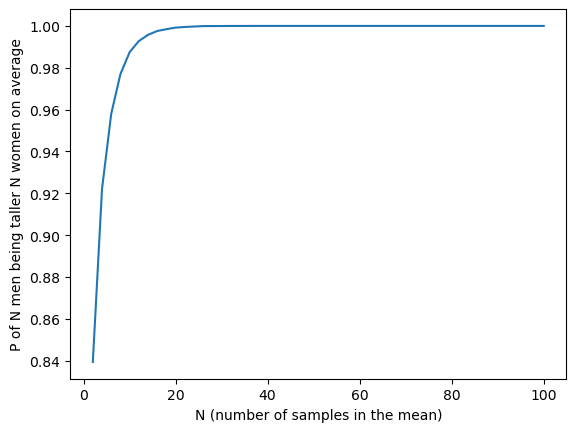

In [16]:
# Let's plot the probability of having a mean between -1 and 1
# as a function of N.

plt.plot(N_range, p_range)
plt.xlabel("N (number of samples in the mean)")
plt.ylabel("P of N men being taller N women on average")
plt.show()

In [36]:
# Finding the number of samples needed to have a probability
# of 99.7% that the mean of the men's heights is greater than
# the mean of women's heights.

p_target = 0.997
p_range = np.array(p_range)
index = np.where(p_range > p_target)[0][0]
N_target = N_range[index]

print("Number of samples needed to have a probability of 99.7%: ", N_target)

Number of samples needed to have a probability of 99.7%:  16
